In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
np.random.seed(12)
sensor = np.array([[8, 15] ,[15, 15], [22, 15], [15, 22]])

def initial_position():
	x = np.random.choice(np.arange(0, 900), p= [1/900]*900)
	r = np.floor(x/30)
	c = x%30
	return r, c
def findProbability(r, c):
	p_U = 0.4
	p_D = 0.1
	p_L = 0.2
	p_R = 0.3

	if(r == 0):
		p_D = 0
	if(c == 0):
		p_L = 0
	if(r == 29):
		p_U = 0
	if(c == 29):
		p_R = 0
	n_factor = p_D + p_L + p_U + p_R
	p_U = p_U/n_factor
	p_D = p_D/n_factor
	p_L = p_L/n_factor
	p_R = p_R/n_factor
	p1 = [p_U, p_D, p_L, p_R]
	return p1
def next_move(r, c):
	p1 = findProbability(r, c)
	x = np.random.choice(np.array([0, 1, 2, 3]), p = p1)
	return x

def sensor_output(s_r, s_c, r, c):
	r1 = abs(r - s_r)
	r2 = abs(c - s_c)
	p1 = 0.9 - (0.1*max(r1, r2))
	if(p1 < 0.5):
		p1 = 0
	p1 = [1-p1, p1]
	#print(p1)
	x = np.random.choice(np.array([0, 1]), p = p1)
	if(x == 1):
		return (r,c)
	return (-1,-1)

    
def sensor_data(r, c):
	output = [(-1,-1)]*4
	for i in range(0, 4):
		output[i] = sensor_output(sensor[i][0], sensor[i][1], r, c)
	return output

def next(r, c):
	x = next_move(r, c)
	if(x == 0):
	   r = r + 1
	if(x == 1):
		r = r - 1
	if(x == 2):
	   c = c - 1
	if(x == 3):
	   c = c + 1
	return r, c

def simulate(T):
	r, c = initial_position()
	sensor_output = [[(-1,-1)*4]]*(T+1)
	originallocations = np.zeros((T+1, 2))
	originallocations[0][0] = r
	originallocations[0][1] = c
	sensor_output[0] = sensor_data(r, c)
	#print("sensor data at postion r = "+ str(r) + "c = " + str(c) + "at T = 0:") 
	#print(sensor_output[0])
	#print("initial position: "+ str(r) + " " + str(c))
	for i in range(0, T):
		r, c = next(r, c)
		originallocations[i+1][0] = r
		originallocations[i+1][1] = c
		#print("sensor data at postion r = "+ str(r) + "c = " + str(c) + "at T = "+ str(i + 1) + ": ")
		sensor_output[i+1] = sensor_data(r, c)
		#print(sensor_output[i+1])
	return originallocations, sensor_output

In [2]:
originallocations, sensor_output = simulate(25)
print(originallocations)
print("---------------------------------------")
for i in range(0, len(sensor_output)):
    print("T = "+ str(i) + " ")
    print(sensor_output[i])

[[ 4. 18.]
 [ 4. 19.]
 [ 5. 19.]
 [ 5. 18.]
 [ 5. 19.]
 [ 5. 18.]
 [ 5. 19.]
 [ 5. 20.]
 [ 4. 20.]
 [ 3. 20.]
 [ 4. 20.]
 [ 5. 20.]
 [ 5. 19.]
 [ 4. 19.]
 [ 4. 18.]
 [ 4. 19.]
 [ 4. 18.]
 [ 4. 19.]
 [ 4. 20.]
 [ 5. 20.]
 [ 6. 20.]
 [ 7. 20.]
 [ 8. 20.]
 [ 8. 19.]
 [ 9. 19.]
 [ 9. 20.]]
---------------------------------------
T = 0 
[(4.0, 18), (-1, -1), (-1, -1), (-1, -1)]
T = 1 
[(4.0, 19), (-1, -1), (-1, -1), (-1, -1)]
T = 2 
[(5.0, 19), (-1, -1), (-1, -1), (-1, -1)]
T = 3 
[(5.0, 18), (-1, -1), (-1, -1), (-1, -1)]
T = 4 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 5 
[(5.0, 18), (-1, -1), (-1, -1), (-1, -1)]
T = 6 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 7 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 8 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 9 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 10 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 11 
[(-1, -1), (-1, -1), (-1, -1), (-1, -1)]
T = 12 
[(5.0, 19), (-1, -1), (-1, -1), (-1, -1)]
T = 13 
[(4.0, 19), (-1, -1), (-1, -1), 

In [3]:
def updateBelForSensorAtPosition(bel, r1, c1, l, s_r, s_c, r, c):
	#print(l)
	p1 = 0.9 - (0.1*max(abs(r1 - s_r), abs(c1 - s_c)))
	if(p1 < 0.5):
		p1 = 0
	if l == 0 and r != -1:
		p1 = 0
	elif l == 0:
		p1 = 1-p1
	bel[r1][c1] = p1*bel[r1][c1]
	return bel
def updateBelForSensors(bel, sensordata):
    for i in range(0, 4):
        r,c = sensordata[i]
        #print(r, c)
        sum1 = 0
        for r1 in range(0, 30):
            for c1 in range(0, 30):
                flag = 0
                if(r == r1 and c == c1):
                    flag = 1
                bel = updateBelForSensorAtPosition(bel, r1, c1, flag, sensor[i][0], sensor[i][1], r, c)
                sum1 = sum1 + bel[r1][c1]
        #print(sum1)
        #print(bel[7][18])
        bel = bel/(sum1 + 1e-7)
        #print(bel[7][18])
    #print(bel)
    return bel
def updateBelForAction(bel):
    new_bel = np.zeros((30,30), dtype = np.float64)
    for r in range(0, 30):
        for c in range(0, 30):
            p1 = []
            if(r != 0):
                p1 = findProbability(r-1, c)
                new_bel[r][c] = new_bel[r][c] + p1[0]*bel[r-1][c]
            if(c != 0):
                p1 = findProbability(r, c-1)
                new_bel[r][c] = new_bel[r][c] + p1[3]*bel[r][c-1]
            if(r != 29):
                p1 = findProbability(r+1, c)
                new_bel[r][c] = new_bel[r][c] + p1[1]*bel[r+1][c]
            if(c != 29):
                p1 = findProbability(r, c+1)
                new_bel[r][c] = new_bel[r][c] + p1[2]*bel[r][c+1]
    return new_bel
def maxlocation(bel):
    max_p = 0.0
    max_index = (-1,-1)
    for i in range(0, 30):
        for j in range(0, 30):
            if(bel[i][j] >= max_p):
                max_p = bel[i][j]
                max_index = (i, j)
    return max_index    
def estimatecurrentlocationf(sensor_output, T):
    fbel_list = []
    fbel = np.array([[1/900]*30]*30)
    fbel = updateBelForSensors(fbel, sensor_output[0])
    fbel_list.append(fbel)
    for i in range(1, T+1):
        fbel = updateBelForAction(fbel)
        fbel = updateBelForSensors(fbel, sensor_output[i])
        fbel_list.append(fbel)
    return fbel_list
def find_sensorprobab(r1, c1, sensoroutput):
    ans = 1.0
    for i in range(0, 4):
        r = sensoroutput[i][0]
        c = sensoroutput[i][1]
        s_r = sensor[i][0]
        s_c = sensor[i][1]
        p1 = 0.9 - (0.1*max(abs(r1 - s_r), abs(c1 - s_c)))
        if(p1 < 0.5):
            p1 = 0
        if((r != r1 or c != c1) and r != -1):
            p1 = 0
        elif((r != r1 or c != c1)):
            p1 = 1 - p1
        ans = ans*p1
    return ans
def backward(b, sensor_output, T):
    new_b = np.zeros((30,30), dtype = np.float64)
    for r in range(0, 30):
        for c in range(0, 30):
            p1 = []
            if(r != 0):
                p1 = findProbability(r-1, c)
                new_b[r][c] = new_b[r][c] + p1[1]*b[r-1][c]*find_sensorprobab(r-1, c, sensor_output)
            if(c != 0):
                p1 = findProbability(r, c-1)
                new_b[r][c] = new_b[r][c] + p1[2]*b[r][c-1]*find_sensorprobab(r, c-1, sensor_output)
            if(r != 29):
                p1 = findProbability(r+1, c)
                new_b[r][c] = new_b[r][c] + p1[0]*b[r+1][c]*find_sensorprobab(r+1, c, sensor_output)
            if(c != 29):
                p1 = findProbability(r, c+1)
                new_b[r][c] = new_b[r][c] + p1[3]*b[r][c+1]*find_sensorprobab(r, c+1, sensor_output)
    return new_b 
def forward_backwardalgorithm(sensor_output, T):
    fbel_list = estimatecurrentlocationf(sensor_output, T)
    b = np.ones((30,30), dtype = np.float64)
    i = T
    s = []
    for i in range(0, T+1):
        s.append(np.zeros((30,30), dtype = np.float64))
    while(i >= 0):
        s[i] = b*fbel_list[i]
        sum1 = np.sum(s[i])
        s[i] = s[i]/(sum1 + 1e-7)
        b = backward(b, sensor_output[i], T)
        i = i - 1
    return s, fbel_list
def find_max_location(bel_list, T):
    max_location = []
    for i in range(0, T+1):
        max_location.append(maxlocation(bel_list[i]))
    return max_location

In [4]:
fbel_list = estimatecurrentlocationf(sensor_output, 25)
#print(max_location)

In [5]:
s, fbel_list = forward_backwardalgorithm(sensor_output, 25)
print("with smoothing:")
print(find_max_location(s, 25))
print("without smoothing:")
print(find_max_location(fbel_list, 25))
print("original location:")
print(originallocations)

with smoothing:
[(4, 18), (4, 19), (5, 19), (5, 18), (5, 19), (5, 18), (5, 19), (5, 20), (4, 20), (5, 20), (4, 20), (5, 20), (5, 19), (4, 19), (3, 19), (4, 19), (4, 18), (4, 19), (4, 20), (5, 20), (6, 20), (7, 20), (7, 19), (8, 19), (8, 20), (9, 20)]
without smoothing:
[(4, 18), (4, 19), (5, 19), (5, 18), (6, 18), (5, 18), (6, 18), (6, 19), (6, 20), (7, 20), (6, 20), (7, 20), (5, 19), (4, 19), (4, 20), (5, 20), (4, 18), (4, 19), (4, 20), (5, 20), (5, 21), (5, 20), (5, 21), (8, 19), (8, 20), (9, 20)]
original location:
[[ 4. 18.]
 [ 4. 19.]
 [ 5. 19.]
 [ 5. 18.]
 [ 5. 19.]
 [ 5. 18.]
 [ 5. 19.]
 [ 5. 20.]
 [ 4. 20.]
 [ 3. 20.]
 [ 4. 20.]
 [ 5. 20.]
 [ 5. 19.]
 [ 4. 19.]
 [ 4. 18.]
 [ 4. 19.]
 [ 4. 18.]
 [ 4. 19.]
 [ 4. 20.]
 [ 5. 20.]
 [ 6. 20.]
 [ 7. 20.]
 [ 8. 20.]
 [ 8. 19.]
 [ 9. 19.]
 [ 9. 20.]]


In [6]:
def list2arr(l):
    return np.asarray(l, dtype=np.float32)
def plotable(X):
    x = []
    y = []
    for temp in X:
        x.append(temp[0])
        y.append(temp[1])
    x = list2arr(x)
    y = list2arr(y)
    return x, y
def plot1(a, b):
    x, y = plotable(a)
    plt.plot(x, y)
    x, y = plotable(b)
    plt.plot(x, y)
    plt.legend(['Actual', 'Observed'])
    plt.show()
def plot2(a):
    x, y = plotable(a)
    plt.plot(x, y)
    plt.legend(['Actual'])
    plt.show()    

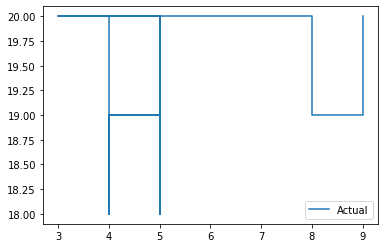

In [7]:
plot2(originallocations)

without smoothing


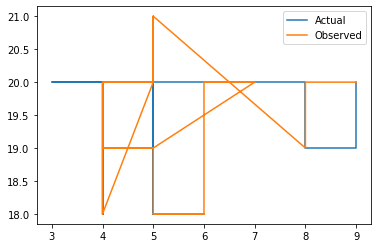

In [8]:
print("without smoothing")
plot1(originallocations,find_max_location(fbel_list, 25))

with smoothing


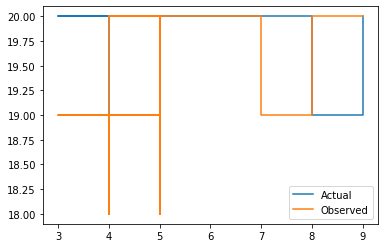

In [9]:
print("with smoothing")
plot1(originallocations,find_max_location(s, 25))

In [10]:
def plotmanhattan(a, b):
    x, y = plotable(a)
    x1, y1 = plotable(b)
    c = np.zeros(len(x))
    for i in range(0, len(x)):
        ans1 = abs(x[i]- x1[i]) + abs(y[i] - y1[i]) 
        c[i] = ans1
    d = range(0, len(x))
    plt.plot(np.array(d), c)

without smoothing


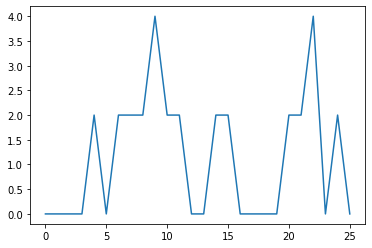

In [11]:
print("without smoothing")
plotmanhattan(originallocations,find_max_location(fbel_list, 25))

with smoothing


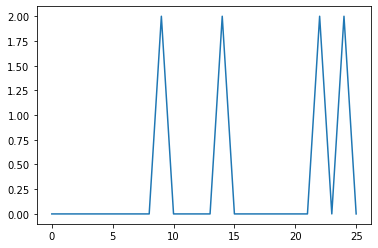

In [12]:
print("with smoothing")
plotmanhattan(originallocations,find_max_location(s, 25))

In [13]:
def plotloglikelihood(bel):
    x = np.zeros(bel.shape)
    for i in range(0, 30):
        for j in range(0, 30):
            if(bel[i][j] == 0):
                x[i][j] = 0
            else:
                x[i][j] = abs(np.log(bel[i][j]))
    fig, ax = plt.subplots()
    plt.figure(figsize = (60,60))
    ax.set_xticks(np.arange(30))
    ax.set_yticks(np.arange(30))
    x1 = range(0, 30)
    y1 = range(0, 30)
    ax.set_xticklabels(x1)
    ax.set_yticklabels(y1) 
    ax.set_title("log likelihood")
    im = ax.imshow(x, aspect='auto')

/home/ankit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


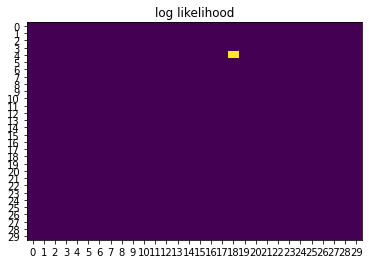

<Figure size 4320x4320 with 0 Axes>

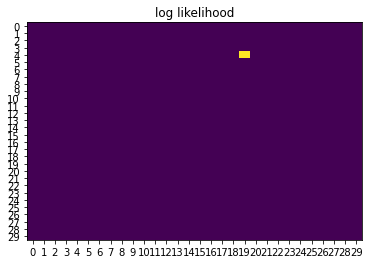

<Figure size 4320x4320 with 0 Axes>

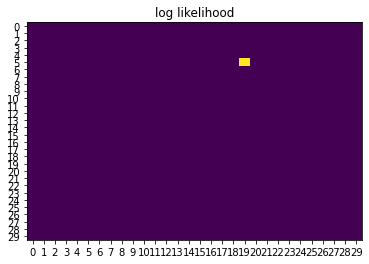

<Figure size 4320x4320 with 0 Axes>

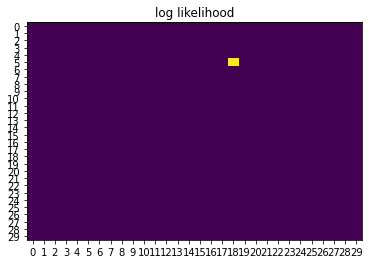

<Figure size 4320x4320 with 0 Axes>

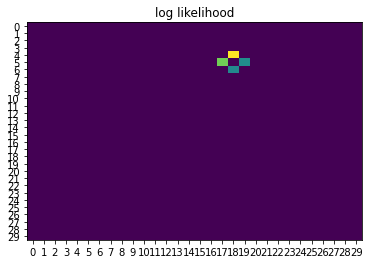

<Figure size 4320x4320 with 0 Axes>

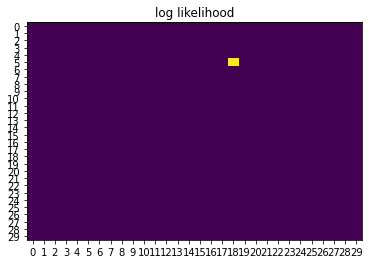

<Figure size 4320x4320 with 0 Axes>

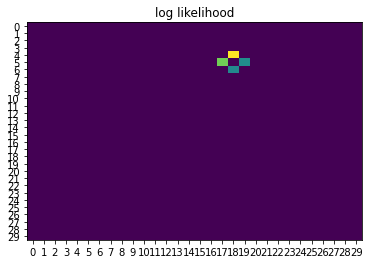

<Figure size 4320x4320 with 0 Axes>

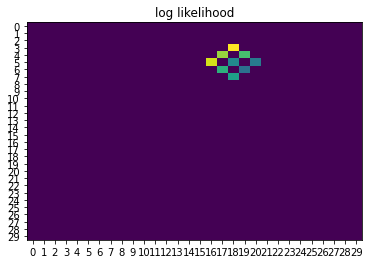

<Figure size 4320x4320 with 0 Axes>

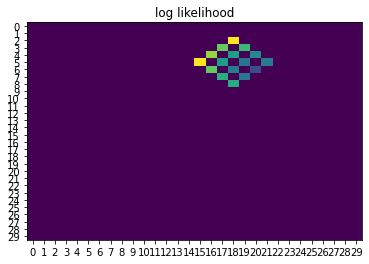

<Figure size 4320x4320 with 0 Axes>

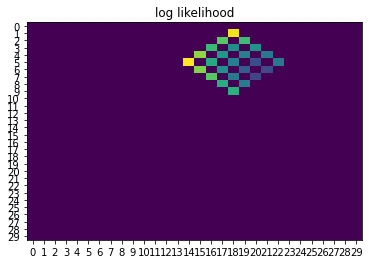

<Figure size 4320x4320 with 0 Axes>

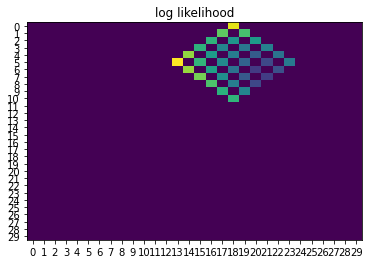

<Figure size 4320x4320 with 0 Axes>

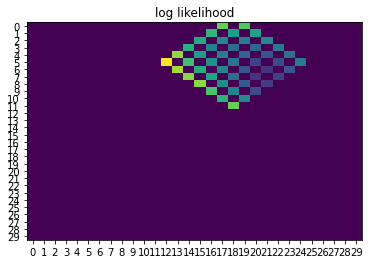

<Figure size 4320x4320 with 0 Axes>

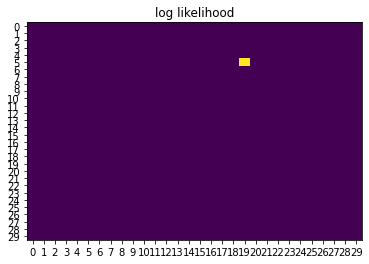

<Figure size 4320x4320 with 0 Axes>

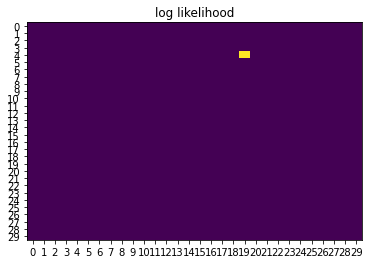

<Figure size 4320x4320 with 0 Axes>

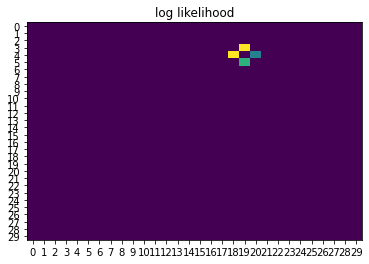

<Figure size 4320x4320 with 0 Axes>

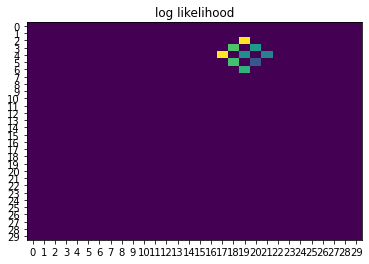

<Figure size 4320x4320 with 0 Axes>

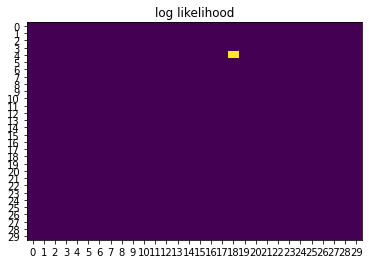

<Figure size 4320x4320 with 0 Axes>

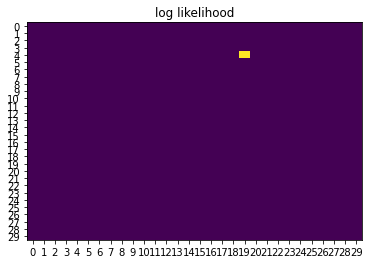

<Figure size 4320x4320 with 0 Axes>

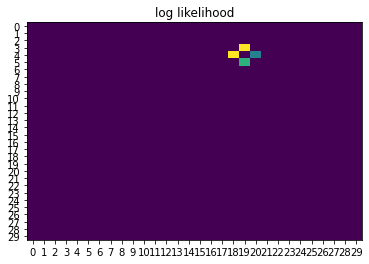

<Figure size 4320x4320 with 0 Axes>

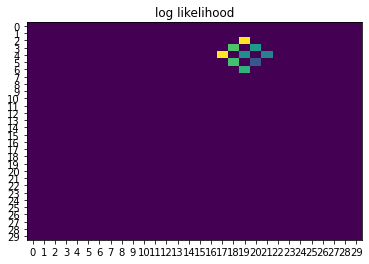

<Figure size 4320x4320 with 0 Axes>

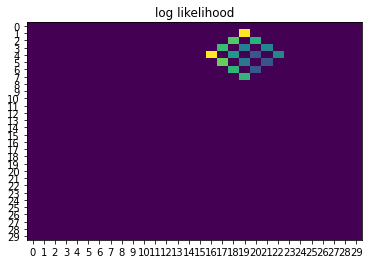

<Figure size 4320x4320 with 0 Axes>

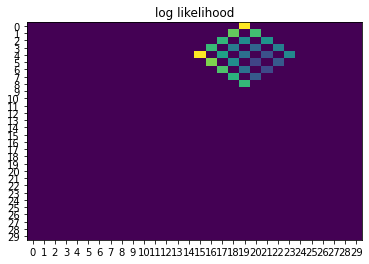

<Figure size 4320x4320 with 0 Axes>

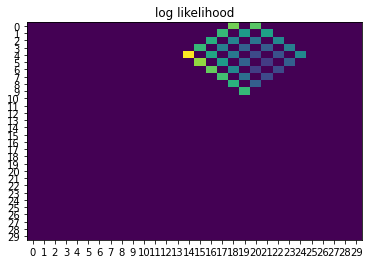

<Figure size 4320x4320 with 0 Axes>

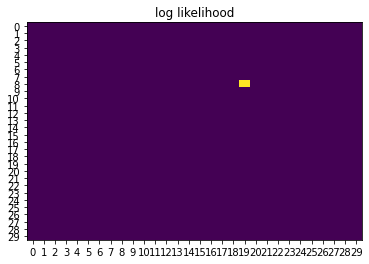

<Figure size 4320x4320 with 0 Axes>

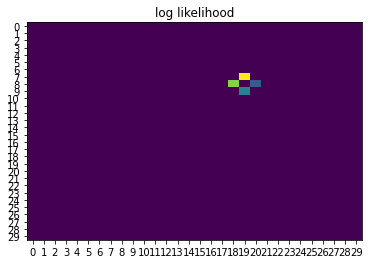

<Figure size 4320x4320 with 0 Axes>

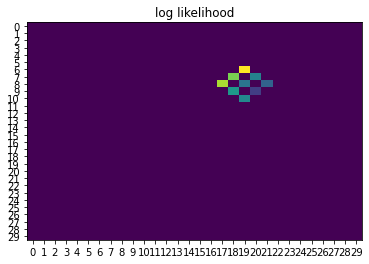

<Figure size 4320x4320 with 0 Axes>

In [14]:
#loglikelihoog at each time step without smoothing
for i in fbel_list:
    plotloglikelihood(i)

In [15]:
print(originallocations)

[[ 4. 18.]
 [ 4. 19.]
 [ 5. 19.]
 [ 5. 18.]
 [ 5. 19.]
 [ 5. 18.]
 [ 5. 19.]
 [ 5. 20.]
 [ 4. 20.]
 [ 3. 20.]
 [ 4. 20.]
 [ 5. 20.]
 [ 5. 19.]
 [ 4. 19.]
 [ 4. 18.]
 [ 4. 19.]
 [ 4. 18.]
 [ 4. 19.]
 [ 4. 20.]
 [ 5. 20.]
 [ 6. 20.]
 [ 7. 20.]
 [ 8. 20.]
 [ 8. 19.]
 [ 9. 19.]
 [ 9. 20.]]


In [16]:
def Predict(fbel_list, T, to_T):
    bel = fbel_list[T]
    for i in range(T+1, to_T+1):
        bel = updateBelForAction(bel)
    return bel

(12, 21)

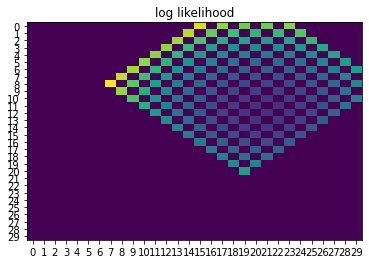

<Figure size 4320x4320 with 0 Axes>

In [17]:
# At T = 35
plotloglikelihood(Predict(fbel_list, 25, 35))
maxlocation(Predict(fbel_list, 25, 35))

(16, 22)

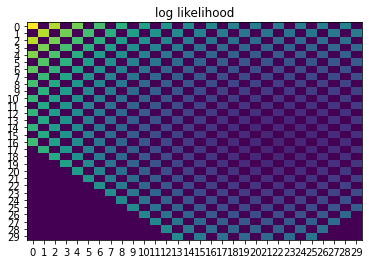

<Figure size 4320x4320 with 0 Axes>

In [18]:
# At T = 50
plotloglikelihood(Predict(fbel_list, 25, 50))
maxlocation(Predict(fbel_list, 25, 50))

In [19]:
def updateBelForActionForMLP(bel):
    new_bel = np.zeros((30,30), dtype = np.float64)
    new_bel_l = np.ones((30,30, 2))*(-1)
    for r in range(0, 30):
        for c in range(0, 30):
            p1 = []
            if(r != 0):
                p1 = findProbability(r-1, c)
                if(p1[0]*bel[r-1][c] >= new_bel[r][c]):
                    new_bel[r][c] = p1[0]*bel[r-1][c]
                    new_bel_l[r][c][0] = r-1
                    new_bel_l[r][c][1] = c
            if(c != 0):
                p1 = findProbability(r, c-1)
                if(p1[3]*bel[r][c-1] >= new_bel[r][c]):
                    new_bel[r][c] = p1[3]*bel[r][c-1]
                    new_bel_l[r][c][0] = r 
                    new_bel_l[r][c][1] = c-1
            if(r != 29):
                p1 = findProbability(r+1, c)
                if(p1[1]*bel[r+1][c] >= new_bel[r][c]):
                    new_bel[r][c] = p1[1]*bel[r+1][c]
                    new_bel_l[r][c][0] = r+1
                    new_bel_l[r][c][1] = c
            if(c != 29):
                p1 = findProbability(r, c+1)
                if(p1[2]*bel[r][c+1] >= new_bel[r][c]):
                    new_bel[r][c] = p1[2]*bel[r][c+1]
                    new_bel_l[r][c][0] = r
                    new_bel_l[r][c][1] = c+1
    return new_bel, new_bel_l    
def MostLikelyPath(sensor_output, T):
    loc_list = []
    fbel = np.array([[1/900]*30]*30)
    fbel = updateBelForSensors(fbel, sensor_output[0])
    for i in range(1, T+1):
        fbel, loc = updateBelForActionForMLP(fbel)
        fbel = updateBelForSensors(fbel, sensor_output[i])
        loc_list.append(loc)
    i = T-1
    path = []
    r,c = maxlocation(fbel)
    path.append((r,c))
    while(i >= 0):
        r1 = int(loc_list[i][r][c][0])
        c1 = int(loc_list[i][r][c][1]) 
        r, c = r1, c1
        path.append((r,c))
        i = i - 1
    return path

In [20]:
mlp = MostLikelyPath(sensor_output, 25)
mlp.reverse()
print(mlp)

[(4, 18), (4, 19), (5, 19), (5, 18), (5, 19), (5, 18), (5, 19), (5, 20), (5, 21), (5, 20), (5, 21), (5, 20), (5, 19), (4, 19), (3, 19), (3, 18), (4, 18), (4, 19), (4, 20), (5, 20), (6, 20), (7, 20), (8, 20), (8, 19), (8, 20), (9, 20)]


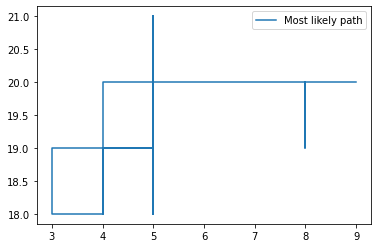

In [21]:
def plot3(a):
    x, y = plotable(a)
    plt.plot(x, y)
    plt.legend(['Most likely path'])
    plt.show()  
plot3(mlp)

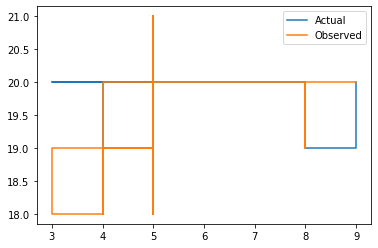

In [22]:
plot1(originallocations, mlp)

In [23]:
print(maxlocation(Predict(fbel_list, 25, 35)))

(12, 21)


In [24]:
print(maxlocation(Predict(fbel_list, 25, 50)))

(16, 22)
